In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 20)

import cv2
from scipy.signal import convolve2d
from mycv import conv2D, imread, imshow, gaussian_kernel, normalize_minmax

from utils import *
    
resdir = 'res'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
TASK = 3
if not os.path.exists('{}/{}'.format(resdir, task_dirtree[TASK][0])):
    os.makedirs('{}/{}'.format(resdir, task_dirtree[TASK][0]))

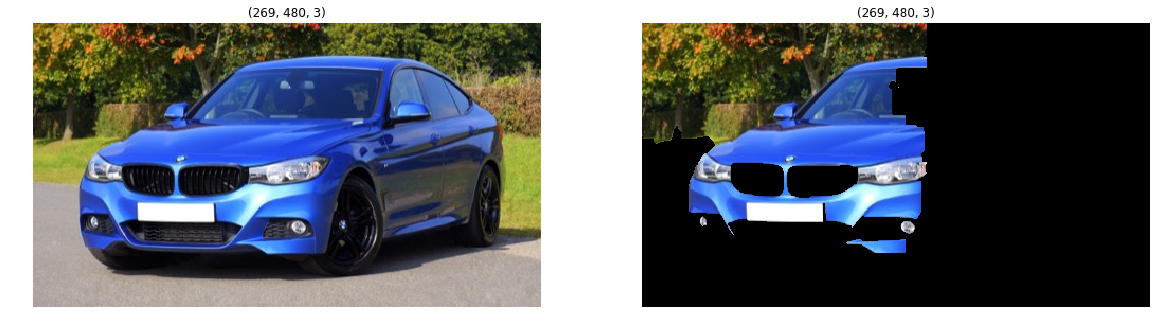

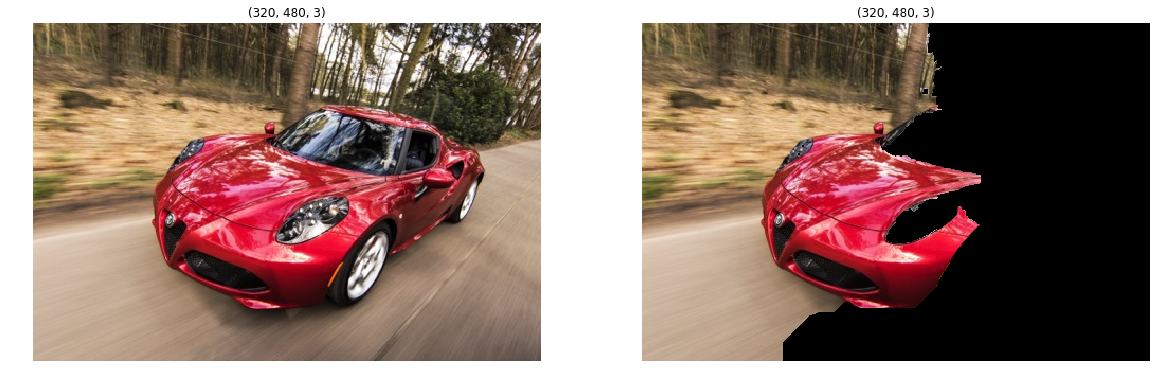

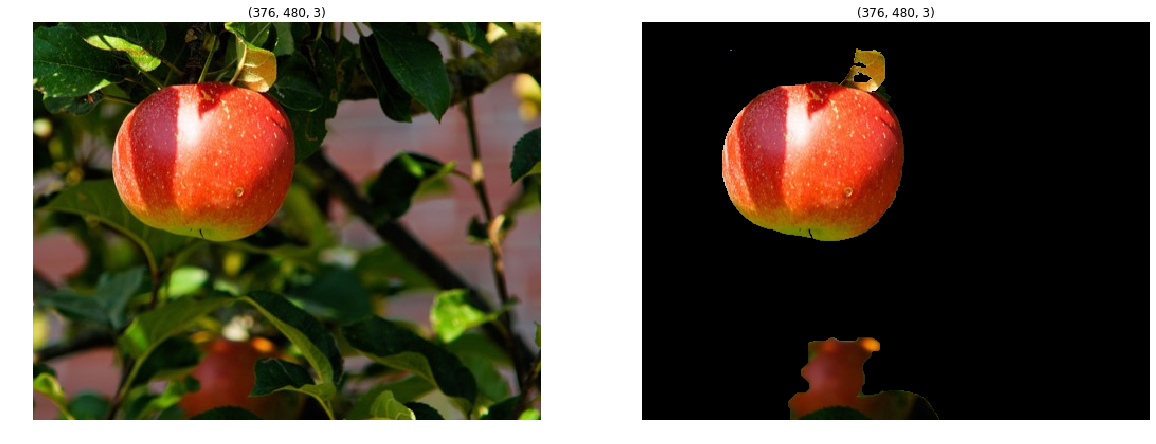

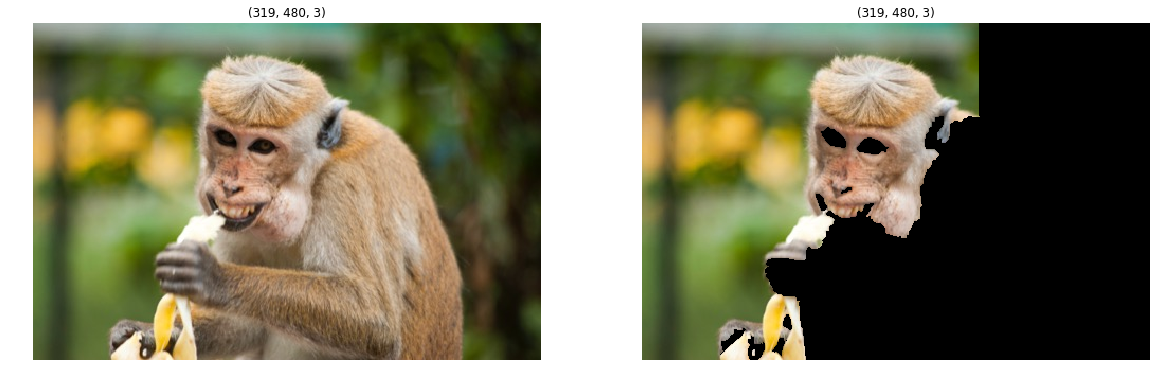

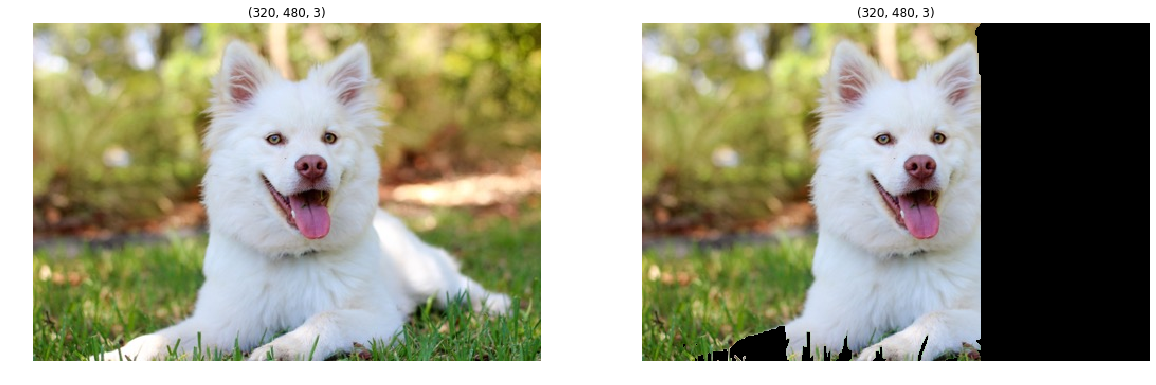

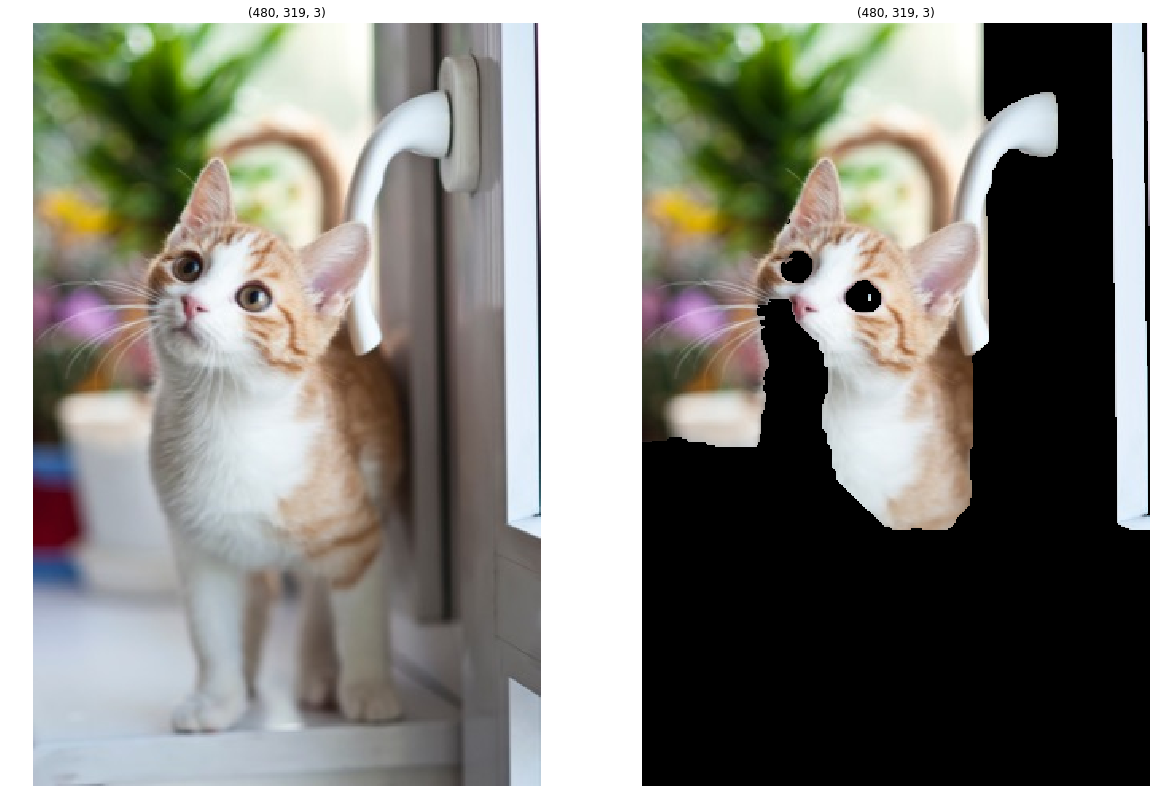

In [7]:
for example_id in range(1,7):
    image, image_gray = get_example(example_id, TASK, brightness_value=0, clahe=False, show=False)
    imshow(image, sub=(1,2,1))
    
    mask = np.zeros(image.shape[:2], np.uint8)
    
    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)
   
    rect = (0, 0, *image_gray.shape)
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
   
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    image = image * mask2[:,:,np.newaxis]

    imshow(image, sub=(1,2,2))
    plt.show()